# Chapter 6. Financial Time Series

                      The only reason for time is so that everything doesn’t happen at once. — Albert Einstein

## 차례 

* pandas Basics
    * Frist Steps with DataFrame Class
    * Second Steps with DataFrame Class
    * Basic Analytics
    * Series Class
    * GroupBy Operations
* Financial Data
* Regression Analysis
* High-Frequency Data
* Conclusions

## pandas Basics

In a sense, pandas is built “on top” of NumPy. So, for example, NumPy universal functions
will generally work on pandas objects as well. We therefore import both to begin with:

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd

#### Frist Steps with DataFrame Class

In [2]:
df = pd.DataFrame([10, 20, 30, 40],columns=['numbers'],index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


#### DataFrame is consist of 
    * Data
        Data itself can be provided in different shapes and types ('list', 'tuple', 'ndarray', and 'dict' objects are candidates)
    * Lables
        Data is organized in columns, which can have custom names.
    * Index
        There is an index that can take on different formats (e.g., numbers, strings, time information).

In [3]:
df.index # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [4]:
df.columns # the column names

Index([u'numbers'], dtype='object')

In [5]:
df.ix['c'] # selection via index

numbers    30
Name: c, dtype: int64

In [6]:
df.ix[['a', 'd']] # selection of multiple indices

,numbers
a,10
d,40


In [7]:
df.ix[df.index[1:3]] # selection via Index object

,numbers
b,20
c,30


In [8]:
df.sum() # sum per column

numbers    100
dtype: int64

In [9]:
df.apply(lambda x: x ** 2) # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [10]:
df ** 2 # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [12]:
df['floats'] # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [13]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [14]:
df['floats'] = (1.5, 2.5, 3.5, 4.5),index=['d', 'a', 'b', 'c'])
df

SyntaxError: invalid syntax (<ipython-input-14-6d236d33b502>, line 1)

In [15]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'])
df

,numbers,floats,names
a,10,1.5,NaN
b,20,2.5,NaN
c,30,3.5,NaN
d,40,4.5,NaN


In [16]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},ignore_index=True)  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,NaN
1,20,2.50,NaN
2,30,3.50,NaN
3,40,4.50,NaN
4,100,5.75,Henry


In [17]:
df

,numbers,floats,names
a,10,1.5,NaN
b,20,2.5,NaN
c,30,3.5,NaN
d,40,4.5,NaN


In [18]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,NaN,10
b,2.50,NaN,20
c,3.50,NaN,30
d,4.50,NaN,40
z,5.75,Henry,100


In [21]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],index=['a', 'b', 'c', 'd', 'y'],columns=['squares',]))  # temporary object

,floats,names,numbers,squares
a,1.50,NaN,10,1
b,2.50,NaN,20,4
c,3.50,NaN,30,9
d,4.50,NaN,40,16
z,5.75,Henry,100,NaN


In [31]:
df

,floats,names,numbers,squares
a,1.50,NaN,10,1
b,2.50,NaN,20,4
c,3.50,NaN,30,9
d,4.50,NaN,40,16
y,NaN,NaN,NaN,25
z,5.75,NaN,100,NaN
z,5.75,Henry,100,NaN


In [22]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],index=['a', 'b', 'c', 'd', 'y'],columns=['squares',]),how='outer')
df

,floats,names,numbers,squares
a,1.50,NaN,10,1
b,2.50,NaN,20,4
c,3.50,NaN,30,9
d,4.50,NaN,40,16
y,NaN,NaN,NaN,25
z,5.75,Henry,100,NaN


In [23]:
df[['numbers', 'squares']].mean()  # column-wise mean

numbers    40
squares    11
dtype: float64

In [24]:
df[['numbers', 'squares']].std()   # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

#### Second Steps with DataFrame Class

DatetimeIndex to manage time series data -> numpy.ndarry

In [25]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-1.383722, -0.58961 ,  0.214885, -0.059195],
       [-1.223309, -0.6353  ,  1.325748,  1.560994],
       [ 0.234544,  0.913002, -0.19347 ,  0.562207],
       [ 0.137731,  0.566828, -1.830457, -0.746366],
       [ 1.628214, -0.581603, -0.327048, -0.003073],
       [ 0.392329,  0.333371,  0.334803, -0.095869],
       [-1.136833, -1.820032,  0.084279,  1.216153],
       [ 0.44257 , -0.406377,  0.594738, -1.296958],
       [ 0.051502, -0.172668,  1.029098,  1.730358]])

In [26]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.383722,-0.589610,0.214885,-0.059195
1,-1.223309,-0.635300,1.325748,1.560994
2,0.234544,0.913002,-0.193470,0.562207
3,0.137731,0.566828,-1.830457,-0.746366
4,1.628214,-0.581603,-0.327048,-0.003073
5,0.392329,0.333371,0.334803,-0.095869
6,-1.136833,-1.820032,0.084279,1.216153
7,0.442570,-0.406377,0.594738,-1.296958
8,0.051502,-0.172668,1.029098,1.730358


In [27]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-1.383722,-0.589610,0.214885,-0.059195
1,-1.223309,-0.635300,1.325748,1.560994
2,0.234544,0.913002,-0.193470,0.562207
3,0.137731,0.566828,-1.830457,-0.746366
4,1.628214,-0.581603,-0.327048,-0.003073
5,0.392329,0.333371,0.334803,-0.095869
6,-1.136833,-1.820032,0.084279,1.216153
7,0.442570,-0.406377,0.594738,-1.296958
8,0.051502,-0.172668,1.029098,1.730358


In [28]:
df['No2'][3] # value in column No2 at index position 3

0.56682835768059192

In [32]:
dates = pd.date_range('2015-01-01', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [33]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-1.383722,-0.589610,0.214885,-0.059195
2015-02-28,-1.223309,-0.635300,1.325748,1.560994
2015-03-31,0.234544,0.913002,-0.193470,0.562207
2015-04-30,0.137731,0.566828,-1.830457,-0.746366
2015-05-31,1.628214,-0.581603,-0.327048,-0.003073
2015-06-30,0.392329,0.333371,0.334803,-0.095869
2015-07-31,-1.136833,-1.820032,0.084279,1.216153
2015-08-31,0.442570,-0.406377,0.594738,-1.296958
2015-09-30,0.051502,-0.172668,1.029098,1.730358


### ARRAYS AND DATAFRAMES

You can generate a DataFrame object in general from an ndarray object. But you can also easily generate an
ndarray object out of a DataFrame by using the function array of NumPy.

#### Basic Analytics

In [34]:
df.sum()

No1   -0.856973
No2   -2.392388
No3    1.232577
No4    2.868252
dtype: float64

In [35]:
df.mean()

No1   -0.095219
No2   -0.265821
No3    0.136953
No4    0.318695
dtype: float64

In [36]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-1.383722,-0.589610,0.214885,-0.059195
2015-02-28,-2.607031,-1.224910,1.540633,1.501799
2015-03-31,-2.372487,-0.311908,1.347163,2.064007
2015-04-30,-2.234756,0.254921,-0.483293,1.317641
2015-05-31,-0.606542,-0.326682,-0.810342,1.314568
2015-06-30,-0.214213,0.006689,-0.475539,1.218699
2015-07-31,-1.351046,-1.813343,-0.391259,2.434852
2015-08-31,-0.908476,-2.219720,0.203478,1.137894
2015-09-30,-0.856973,-2.392388,1.232577,2.868252


In [37]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.095219,-0.265821,0.136953,0.318695
std,0.981037,0.808319,0.912544,1.034633
min,-1.383722,-1.820032,-1.830457,-1.296958
25%,-1.136833,-0.589610,-0.193470,-0.095869
50%,0.137731,-0.406377,0.214885,-0.003073
75%,0.392329,0.333371,0.594738,1.216153
max,1.628214,0.913002,1.325748,1.730358


In [38]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,NaN,NaN,0.463557,NaN
2015-02-28,NaN,NaN,1.151412,1.249398
2015-03-31,0.484297,0.955511,NaN,0.749805
2015-04-30,0.371121,0.752880,NaN,NaN
2015-05-31,1.276015,NaN,NaN,NaN
2015-06-30,0.626362,0.577383,0.578621,NaN
2015-07-31,NaN,NaN,0.290309,1.102793
2015-08-31,0.665260,NaN,0.771193,NaN
2015-09-30,0.226941,NaN,1.014445,1.315431


In [40]:
%%time
np.sqrt(df).sum()

CPU times: user 459 µs, sys: 48 µs, total: 507 µs
Wall time: 485 µs


No1    3.649997
No2    2.285775
No3    4.269536
No4    4.417426
dtype: float64

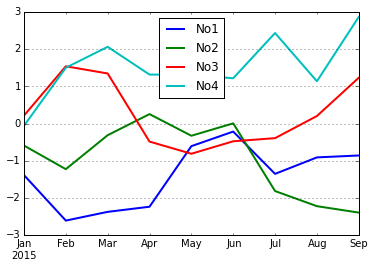

In [41]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

#### Series Class

In [42]:
type(df)

pandas.core.frame.DataFrame

In [43]:
df['No1']

2015-01-31   -1.383722
2015-02-28   -1.223309
2015-03-31    0.234544
2015-04-30    0.137731
2015-05-31    1.628214
2015-06-30    0.392329
2015-07-31   -1.136833
2015-08-31    0.442570
2015-09-30    0.051502
Freq: M, Name: No1, dtype: float64

In [44]:
type(df['No1'])

pandas.core.series.Series

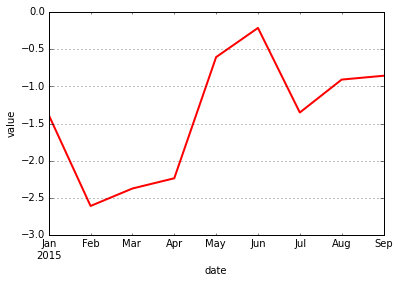

In [45]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

#### GroupBy Operations

In [46]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-1.383722,-0.589610,0.214885,-0.059195,Q1
2015-02-28,-1.223309,-0.635300,1.325748,1.560994,Q1
2015-03-31,0.234544,0.913002,-0.193470,0.562207,Q1
2015-04-30,0.137731,0.566828,-1.830457,-0.746366,Q2
2015-05-31,1.628214,-0.581603,-0.327048,-0.003073,Q2
2015-06-30,0.392329,0.333371,0.334803,-0.095869,Q2
2015-07-31,-1.136833,-1.820032,0.084279,1.216153,Q3
2015-08-31,0.442570,-0.406377,0.594738,-1.296958,Q3
2015-09-30,0.051502,-0.172668,1.029098,1.730358,Q3


In [48]:
groups = df.groupby('Quarter')
groups

In [49]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.790829,-0.103969,0.449054,0.688002
Q2,0.719425,0.106199,-0.607567,-0.281769
Q3,-0.214253,-0.799692,0.569372,0.549851


In [50]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.234544,0.913002,1.325748,1.560994
Q2,1.628214,0.566828,0.334803,-0.003073
Q3,0.442570,-0.172668,1.029098,1.730358


In [51]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [52]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even','Odd', 'Even', 'Odd']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2015-01-31,-1.383722,-0.589610,0.214885,-0.059195,Q1,Odd
2015-02-28,-1.223309,-0.635300,1.325748,1.560994,Q1,Even
2015-03-31,0.234544,0.913002,-0.193470,0.562207,Q1,Odd
2015-04-30,0.137731,0.566828,-1.830457,-0.746366,Q2,Even
2015-05-31,1.628214,-0.581603,-0.327048,-0.003073,Q2,Odd
2015-06-30,0.392329,0.333371,0.334803,-0.095869,Q2,Even
2015-07-31,-1.136833,-1.820032,0.084279,1.216153,Q3,Odd
2015-08-31,0.442570,-0.406377,0.594738,-1.296958,Q3,Even
2015-09-30,0.051502,-0.172668,1.029098,1.730358,Q3,Odd


In [53]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [54]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [55]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.223309 -0.635300  1.325748  1.560994
        Odd      -0.574589  0.161696  0.010708  0.251506
Q2      Even      0.265030  0.450100 -0.747827 -0.421117
        Odd       1.628214 -0.581603 -0.327048 -0.003073
Q3      Even      0.442570 -0.406377  0.594738 -1.296958
        Odd      -0.542665 -0.996350  0.556689  1.473255

## Financial Data

In [18]:
import pandas.io.data as web

In [19]:
DAX = web.DataReader(name='^GDAXI',data_source='yahoo',start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3916 entries, 2000-01-03 to 2015-05-15
Data columns (total 6 columns):
Open         3916 non-null float64
High         3916 non-null float64
Low          3916 non-null float64
Close        3916 non-null float64
Volume       3916 non-null int64
Adj Close    3916 non-null float64
dtypes: float64(5), int64(1)
memory usage: 214.2 KB


In [20]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-11,11674.51953,11702.12988,11622.01953,11673.34961,70980300,11673.34961
2015-05-12,11557.96973,11565.20020,11377.34961,11472.41016,101551000,11472.41016
2015-05-13,11532.96973,11596.46973,11301.62988,11351.45996,104879700,11351.45996
2015-05-14,11299.19043,11579.79980,11218.54004,11559.82031,70738400,11559.82031
2015-05-15,11593.20020,11632.36035,11383.23047,11447.03027,94826300,11447.03027


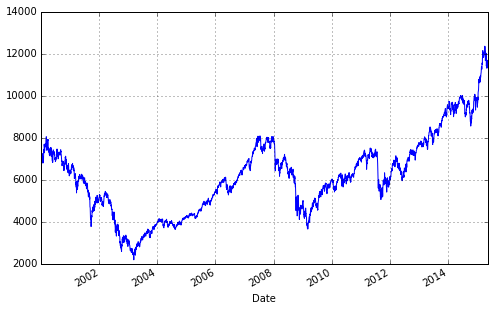

In [21]:
DAX['Close'].plot(figsize=(8, 5))

In [22]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] /
                                DAX['Close'][i - 1])

CPU times: user 1min 49s, sys: 662 ms, total: 1min 49s
Wall time: 1min 50s


/Users/moodern/.venv/finpy/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
DAX[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2015-05-11,11673.34961,-0.003112
2015-05-12,11472.41016,-0.017363
2015-05-13,11351.45996,-0.010599
2015-05-14,11559.82031,0.018189
2015-05-15,11447.03027,-0.009805


In [26]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 844 µs, sys: 355 µs, total: 1.2 ms
Wall time: 886 µs


In [27]:
DAX[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2015-05-11,11673.34961,-0.003112,-0.003112
2015-05-12,11472.41016,-0.017363,-0.017363
2015-05-13,11351.45996,-0.010599,-0.010599
2015-05-14,11559.82031,0.018189,0.018189
2015-05-15,11447.03027,-0.009805,-0.009805


### VECTORIZATION WITH DATAFRAMES

In general, you can use the same vectorization approaches with pandas DataFrame objects as you would whenever
you could do such an operation with two NumPy ndarray objects containing the same data.

In [28]:
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10911e850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10cf30a90>], dtype=object)

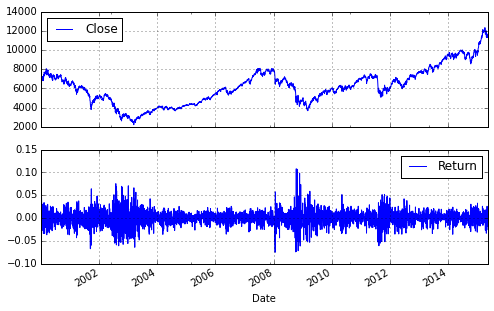

In [29]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',figsize=(8, 5))

In [31]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2015-05-11,11673.34961,11875.309757,10157.703203
2015-05-12,11472.41016,11874.643811,10164.726815
2015-05-13,11351.45996,11863.821662,10171.064236
2015-05-14,11559.82031,11858.117630,10178.228644
2015-05-15,11447.03027,11847.294295,10185.335709


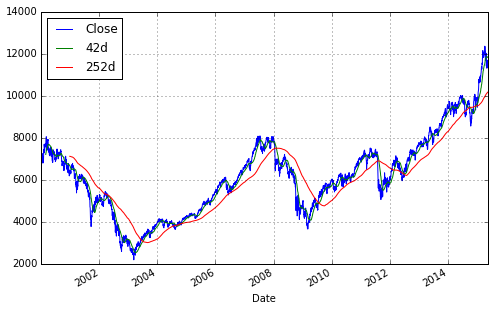

In [32]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5))

In [34]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
# moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x109a9c510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111e91690>], dtype=object)

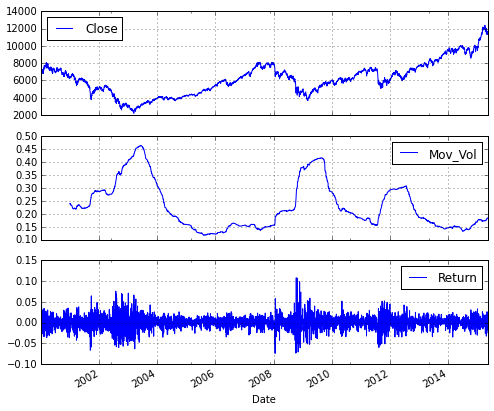

In [35]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',figsize=(8, 7))

## Regression Analysis

In [38]:
import pandas as pd
from urllib import urlretrieve

In [39]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

In [40]:
urlretrieve(es_url, 'es.txt')  # path
urlretrieve(vs_url, 'vs.txt')  # path

('vs.txt', <httplib.HTTPMessage instance at 0x10cf7cc68>)

In [41]:
!ls *.txt
# Windows: use dir

es.txt vs.txt


In [42]:
lines = open('es.txt', 'r').readlines()
lines[:10]

['Price Indices - EURO Currency\n',
 'Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad\n',
 '        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic\n',
 '        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF\n',
 '31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n',
 '01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n',
 '02.01.1987;770.89 ;  891.78 ;   82.57 ;   97.80 ;   97.43 ;   69.37 ;  647.62  ;  65.81\n',
 '05.01.1987;771.89 ;  898.33 ;   82.82 ;   98.60 ;   98.19 ;   69.16 ;  649.94  ;  65.82\n',
 '06.01.1987;775.92 ;  902.32 ;   83.28 ;   99.19 ;   98.83 ;   69.50 ;  652.49  ;  66.06\n',
 '07.01.1987;781.21 ;  899.15 ;   83.78 ;   98.96 ;   98.62 ;   70.59 ;  651.97  ;  66.20\n']

In [43]:
lines = [line.replace(' ','') for line in lines]   # Trimming inside
lines[:10]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n',
 '06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06\n',
 '07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20\n']

In [44]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


### To make the data set easier to import, we do the following:
1. Generate a new text file.
2. Delete unneeded header lines.
3. Write an appropriate new header line to the new file.
4. Add a helper column, DEL (to catch the trailing semicolons).
5. Write all data rows to the new file.

In [45]:
new_file = open('es50.txt', 'w')    # opens a new file
new_file.writelines('date' + lines[3][:-1] + 'DEL' + lines[3][-1])

# writes the corrected third line of the original file
# as first line of new file

new_file.writelines(lines[4:])

# writes the remaining lines of the orignial file

new_file.close()

In [46]:
new_lines = open('es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXFDEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [48]:
es = pd.read_csv('es50.txt', 
                 index_col=0, 
                 parse_dates=True, 
                 sep = ';', dayfirst=True)

CParserError: Error tokenizing data. C error: Expected 9 fields in line 3884, saw 10


In [49]:
es = pd.read_csv('es50.txt', index_col=0, parse_dates=True, dayfirst=True)
es

""
date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXFDEL
31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56
01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56
02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81
05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82
06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06
07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20
08.01.1987;777.62;887.37;83.52;97.87;97.68;71.01;645.57;65.62
09.01.1987;769.80;868.31;83.03;96.31;96.22;71.40;638.03;65.14
12.01.1987;775.07;879.41;83.64;97.54;97.18;71.50;634.14;65.03


In [50]:
np.round(es.tail())

""
date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXFDEL
11.05.2015;3473.89;3624.41;401.34;373.69;467.51;416.54;10892.17;648.81;
12.05.2015;3427.95;3573.10;396.09;369.05;461.89;410.86;10715.11;638.41;
13.05.2015;3413.61;3553.42;395.46;367.92;461.33;410.73;10804.75;643.13;
14.05.2015;3435.02;3602.22;397.99;372.38;464.92;411.35;10770.07;641.24;
15.05.2015;3412.57;3573.07;396.45;370.45;463.12;410.23;10710.87;639.08;


In [51]:
del es['DEL']
es.info()

KeyError: 'DEL'

In [52]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF','SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,sep='', dayfirst=True, header=None,skiprows=4, names=cols)

TypeError: ord() expected a character, but string of length 0 found

In [53]:
es.tail()

""
date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXFDEL
11.05.2015;3473.89;3624.41;401.34;373.69;467.51;416.54;10892.17;648.81;
12.05.2015;3427.95;3573.10;396.09;369.05;461.89;410.86;10715.11;638.41;
13.05.2015;3413.61;3553.42;395.46;367.92;461.33;410.73;10804.75;643.13;
14.05.2015;3435.02;3602.22;397.99;372.38;464.92;411.35;10770.07;641.24;
15.05.2015;3412.57;3573.07;396.45;370.45;463.12;410.23;10710.87;639.08;


In [54]:
vs = pd.read_csv('vs.txt', index_col=0, header=2,parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4167 entries, 1999-01-04 to 2015-05-15
Data columns (total 9 columns):
V2TX    4167 non-null float64
V6I1    3732 non-null float64
V6I2    4167 non-null float64
V6I3    4112 non-null float64
V6I4    4167 non-null float64
V6I5    4167 non-null float64
V6I6    4151 non-null float64
V6I7    4167 non-null float64
V6I8    4155 non-null float64
dtypes: float64(9)
memory usage: 325.5 KB


In [55]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

KeyError: 'SX5E'

In [163]:
import datetime as dt
data = data.join(pd.DataFrame({'VSTOXX':vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

NameError: name 'data' is not defined

In [56]:
data = data.fillna(method='ffill')
data.info()

NameError: name 'data' is not defined

In [57]:
data.tail()

NameError: name 'data' is not defined

In [235]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

NameError: name 'data' is not defined

In [236]:
rets = np.log(data / data.shift(1))
rets.head()

NameError: name 'data' is not defined

In [237]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

NameError: name 'rets' is not defined

In [238]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model

NameError: name 'rets' is not defined

In [239]:
model.beta

NameError: name 'model' is not defined

In [240]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

NameError: name 'xdat' is not defined

In [241]:
rets.corr()

NameError: name 'rets' is not defined

In [242]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
window=252).plot(grid=True, style='b')

NameError: name 'rets' is not defined

## High-Frequency Data

In [164]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [165]:
url1 = 'http://hopey.netfonds.no/posdump.php?'
url2 = 'date=%s%s%s&paper=AAPL.O&csv_format=csv'
url = url1 + url2

In [ ]:
url1 = 'http://hopey.netfonds.no/posdump.php?date=%s%s%s&paper=AAPL.O&csv_format=csv'

In [167]:
year = '2014'
month = '09'
days = ['22', '23', '24', '25']
# dates might need to be updated

In [246]:
AAPL = pd.DataFrame()
for day in days:
    AAPL = AAPL.append(pd.read_csv(url % (year, month, day),index_col=0, header=0, parse_dates=True))
AAPL.columns = ['bid', 'bdepth', 'bdeptht','offer', 'odepth', 'odeptht']
# shorter colummn names

CParserError: Passed header=0 but only 0 lines in file

In [ ]:
AAPL.info()

In [247]:
AAPL[‘bid'].plot()

SyntaxError: invalid syntax (<ipython-input-247-3614cd545dcc>, line 1)

In [248]:
to_plot = AAPL[['bid', 'bdeptht']][
    (AAPL.index > dt.datetime(2014, 9, 22, 0, 0))
&   (AAPL.index < dt.datetime(2014, 9, 23, 2, 59))]
# adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5))

KeyError: "['bid' 'bdeptht'] not in index"

In [249]:
AAPL_resam = AAPL.resample(rule='5min', how='mean')
np.round(AAPL_resam.head(), 2)

""


In [250]:
AAPL_resam['bid'].fillna(method='ffill').plot()

KeyError: 'bid'

In [251]:
def reversal(x):
    return 2 * 95 - x

In [252]:
!rm C:/data/*
# Windows: del /data/*

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## Conclusions

Financial time series data is one of the most common and important forms of data in
finance. The library pandas is generally the tool of choice when it comes to working with
such data sets. Modeled after the data.frame class of R, the pandas DataFrame class
provides a wealth of attributes and methods to attack almost any kind of (financial)
analytics problem you might face. Convenience is another benefit of using pandas: even if
you might be able to generate the same result by using NumPy and/or matplotlib only,
pandas generally has some neat shortcuts based on a powerful and flexible API.
In addition, pandas makes it really easy to retrieve data from a variety of web sources, like
Yahoo! Finance or Google. Compared to “pure” NumPy or matplotlib, it automates the
management of financial time series data in many respects and also provides higher
flexibility when it comes to combining data sets and enlarging existing ones.